# Práctica 01 Fundamentos en Python

## Integrantes:

- Carlos Andrade Hernández. 317000447

In [46]:
# Setup

import numpy as np
import csv

with open('datos.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    nombres = []
    apellidos = []
    horas_dedicadas = []
    calificaciones_obtenidas = []

    # Almacenamos los datos de las columnas
    for row in reader:
        nombres.append(row['nombre'])
        apellidos.append(row['apellido'])
        # Si la hora es nan se le asigna 0
        hora = row['horas_dedicadas']
        if hora.lower() == 'nan':
          horas_dedicadas.append(0)
        else:
          horas_dedicadas.append(int(hora))

        # Si la calificacion es nan se le asigna 0
        calificacion = row['calificaciones_obtenida']
        if calificacion.lower() == 'nan':
          calificaciones_obtenidas.append(0)
        else:
          calificaciones_obtenidas.append(int(calificacion))


In [54]:
"""
Inciso 1: El minimo, maximo, media y desviacion estandar tanto para el
numero de horas dedicadas como para las calificaciones obtenidas.
"""
# Horas dedicadas
min_horas = min(horas_dedicadas)
max_horas = max(horas_dedicadas)
media_horas = np.mean(horas_dedicadas)
desviacion_estandar_horas = np.std(horas_dedicadas)

# Calificaciones Obtenidas
min_calificaciones = min(calificaciones_obtenidas)
max_calificaciones = max(calificaciones_obtenidas)
media_calificaciones = np.mean(calificaciones_obtenidas)
desviacion_estandar_calificaciones = np.std(calificaciones_obtenidas)

print("Min Horas:", min_horas)
print("Max Horas:", max_horas)
print("Media Horas:", media_horas)
print("Desviacion Estandar Horas:", desviacion_estandar_horas)
print("")
print("Min Calificaciones:", min_calificaciones)
print("Max Calificaciones:", max_calificaciones)
print("Media Calificaciones:", media_calificaciones)
print("Desviacion Estandar Calificaciones:", desviacion_estandar_calificaciones)

Min Horas: 2
Max Horas: 178
Media Horas: 99.4
Desviacion Estandar Horas: 56.6572148980163

Min Calificaciones: 0
Max Calificaciones: 100
Media Calificaciones: 57.65
Desviacion Estandar Calificaciones: 36.406421136936814


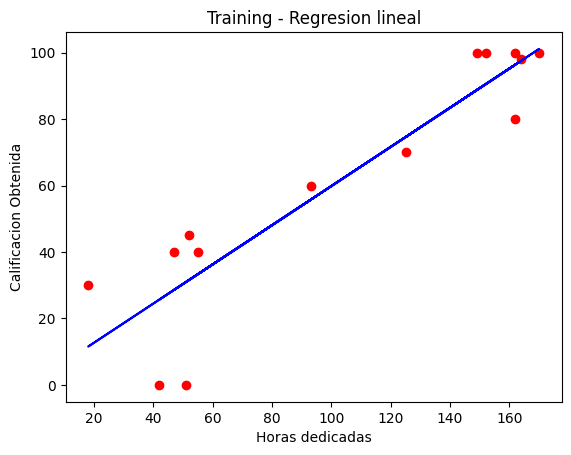

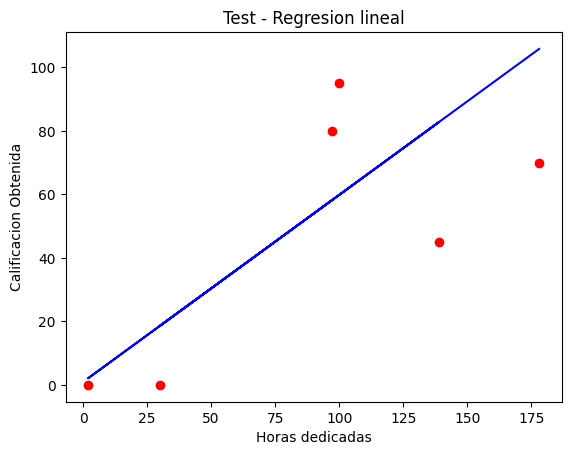

In [52]:
"""
Inciso 2: Lleva a cabo un analisis de regresion lineal utilizando estos datos
y presenta un grafico que muestre el modelo de regresion junto con los datos
originales.
"""
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(horas_dedicadas).reshape(-1, 1)
y = np.array(calificaciones_obtenidas)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=0)

# Objeto para representar la regresion Lineal
regressor = LinearRegression()

# Ajusta el modelo de regresion lineal a los datos de entrenamiento
regressor.fit(xtrain, ytrain)

# Realizan predicciones sobre los datos de prueba (xtest)
pred = regressor.predict(xtest)

# Grafica datos de entrenamiento
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Training - Regresion lineal")
plt.xlabel("Horas dedicadas")
plt.ylabel("Calificacion Obtenida")
plt.show()

# Grafica datos de prueba
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtest, pred, color = 'blue')
plt.title("Test - Regresion lineal")
plt.xlabel("Horas dedicadas")
plt.ylabel("Calificacion Obtenida")
plt.show()

In [59]:
"""
Utiliza el modelo de regresion para realizar una prediccion de la calificacion
de un estudiante que hubiera dedicado n horas en el semestre a la materia
(donde n es la suma de los digitos de su numero de cuenta modulo 50).
"""

n = (3 + 1 + 7 + 0 + 0 + 0 + 4 + 4 + 7) % 50
prediction = regressor.predict([[n]])
print(f"Predicción de calificacion para {n} horas dedicadas: {prediction[0]}")


Predicción de calificacion para 26 horas dedicadas: 16.26012432425071


### INVESTIGACIÓN:
* Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos.

#### R-CUADRADO

El método de R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como coeficiente de determinación, o coeficiente de determinación múltiple si se trata de regresión múltiple.

Este es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal.

El R-cuadrado siempre está entre 0 y 1 (100%)

- 0 indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
- 1 indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos.

Si un modelo pudiera explicar el 100% de la varianza, los valores ajustados siempre serían iguales a los valores observados y, por lo tanto, todos los puntos de los datos estarían sobre la línea de regresión ajustada.

Algunas limitaciones de este metodo podrían ser las siguientes:

- El R-cuadrado no puede determinar si las estimaciones y predicciones de los coeficientes están sesgadas, y es por eso que se deben examinar las gráficas de residuos.

- El R-cuadrado no indica si un modelo de regresión es adecuado. Se puede tener un valor bajo del R-cuadrado para un modelo adecuado o un valor alto del R-cuadrado para un modelo que no se ajusta a los datos.

### Referencia
. Análisis de Regresión: ¿Cómo Puedo Interpretar el R-cuadrado y Evaluar la Bondad de Ajuste? (s/f). Minitab.com. Recuperado el 7 de febrero de 2024, de https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste







